# Predicting Concrete Compressive Strength From Its Components Quantities

![](https://i0.wp.com/theconstructor.org/wp-content/uploads/2014/04/compressive-strength-test-on-concrete-cubes.jpg?fit=657%2C472&ssl=1)


  ## Introduction
Concrete is the most important material in civil engineering and it is  of five major elements in various proportions: cement, water, coarse aggregates, fine aggregates (i.e. sand), and air. Concrete admixtures are natural or manufactured chemicals or additives added during concrete mixing to enhance specific properties of the fresh or hardened concrete, such as workability, durability, or early and final strength. The concrete compressive strength is a  function of age and ingredients. The have been several research to develop the optimum mixure of Concrete. 


## Problem Statement
The Concrete research usually uses Concrete Compressive Strength Test in lab to find out the resultant strengths of different combination of concrete ingredients. This can be costly and time consuming. In this project, I will predict the compressive strength of concrete mixure measured in MPa using the historical records of previous testing and regression analysis methods.

## Data Source

This dataset was taken from [UCI Repository](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength)


Original Owner and Donor
  Prof. I-Cheng Yeh
  Department of Information Management 
  Chung-Hua University, 
  Hsin Chu, Taiwan 30067, R.O.C.
  e-mail:icyeh@chu.edu.tw
  TEL:886-3-5186511

  Date Donated: August 3, 2007
  
  The following table shows the names of the variables and their meanings
  
| variable         | meaning and measurement unit|
| ---------------- | ----------------------------------------------- |
|cement|quantitative, kg in a m3 mixture, Input Variable
|slag|Blast Furnace Slag, quantitative, kg in a m3 mixture,Input Variable
|flyash|Fly Ash, quantitative, kg in a m3 mixture,Input Variable
|water|Blast Furnace Slag, quantitative, kg in a m3 mixture,Input Variable
|superplasticizer|Superplasticizer, quantitative, kg in a m3 mixture,Input Variable
|coarseaggregate|Coarse Aggregate, quantitative, kg in a m3 mixture,Input Variable
|fineaggregate|Fine Aggregate, quantitative, kg in a m3 mixture,Input Variable
|age|Age quantitative, Day (1~365), Input Variable
|csMPa|Concrete compressive strength, quantitative, MPa, Output Variable





____

## Data Extraction & Preparation

In this section, I extract the data from a csv file, analyze it a little and prepare it for further analysis

In [2]:
import numpy 
import pandas as pd

In [3]:
df = pd.read_csv('../data/Concrete_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
df.rename(columns={'flyash':'flya_ash',
                   'superplasticizer':'super_plasticizer',
                   'coarseaggregate':'coarse_aggregate',
                   'fineaggregate':'fine_aggregate',
                   'csMPa':'compressive_strength_csMPa'
                  }, inplace=True)

df.head()

,cement,slag,flya_ash,water,super_plasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength_csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Checking for Missing Values in the Data

In [5]:
df.isnull().sum()

cement                        0
slag                          0
flya_ash                      0
water                         0
super_plasticizer             0
coarse_aggregate              0
fine_aggregate                0
age                           0
compressive_strength_csMPa    0
dtype: int64

### Checking for Duplicates Rows

In [6]:
df[df.duplicated(keep = False)]

,cement,slag,flya_ash,water,super_plasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength_csMPa
72,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
83,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
95,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20


Interesting!

It seems that some records are entered more than once. This may affect the results of the analysis!

I will keep the first record and remove its duplicate.

### Droping the Duplicate rows

In [7]:
df.drop_duplicates(keep='first', inplace=True)

Now, data is ready for further analysis

____

## Exploratory Data Analysis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import normaltest

### Checking The Distributions of the Variables (features nd target)

Cement
Cement Statistics
count    1005.000000
mean      278.631343
std       104.344261
min       102.000000
25%       190.700000
50%       265.000000
75%       349.000000
max       540.000000
Name: cement, dtype: float64


Cement Normality Test Result
P-value: 9.809278312609514e-14 ,    Decision:  cement not normally distributed


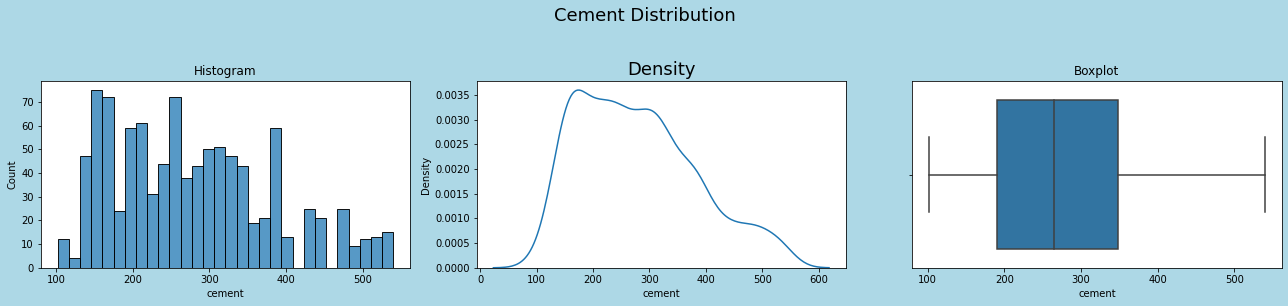

Slag
Slag Statistics
count    1005.000000
mean       72.043483
std        86.170807
min         0.000000
25%         0.000000
50%        20.000000
75%       142.500000
max       359.400000
Name: slag, dtype: float64


Slag Normality Test Result
P-value: 1.0885008864076576e-23 ,    Decision:  slag not normally distributed


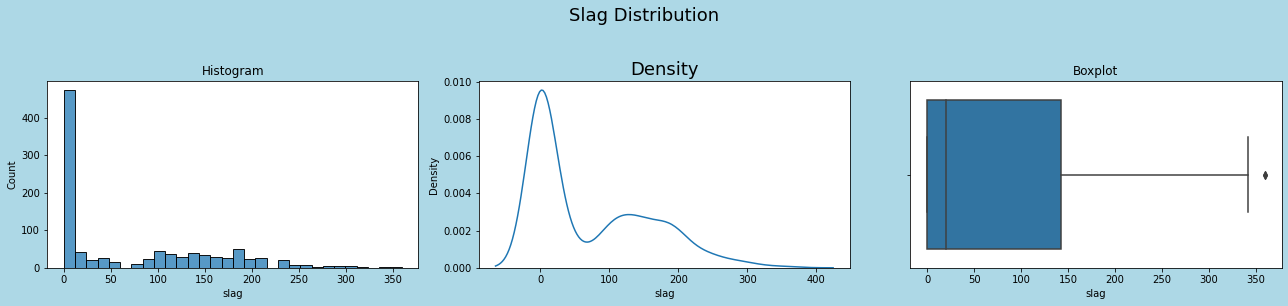

Flya_ash
Flya_ash Statistics
count    1005.000000
mean       55.536318
std        64.207969
min         0.000000
25%         0.000000
50%         0.000000
75%       118.300000
max       200.100000
Name: flya_ash, dtype: float64


Flya_ash Normality Test Result
P-value: 0.0 ,    Decision:  flya_ash not normally distributed


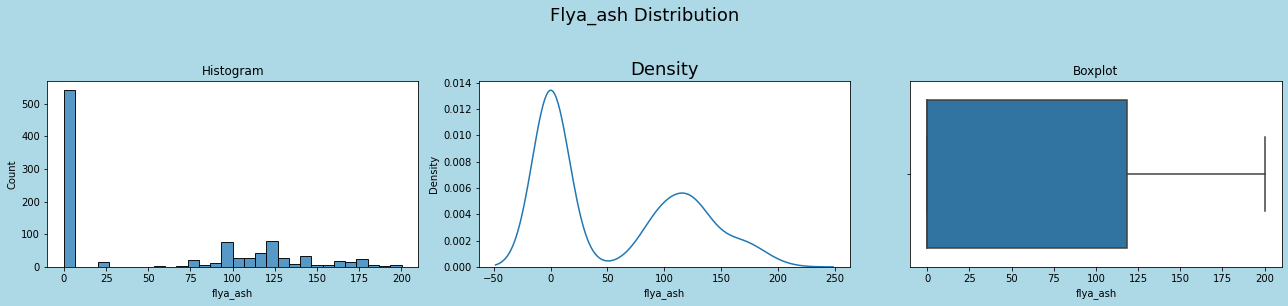

Water
Water Statistics
count    1005.000000
mean      182.075323
std        21.339334
min       121.800000
25%       166.600000
50%       185.700000
75%       192.900000
max       247.000000
Name: water, dtype: float64


Water Normality Test Result
P-value: 0.5005793792135014 ,    Decision:  water normally distributed


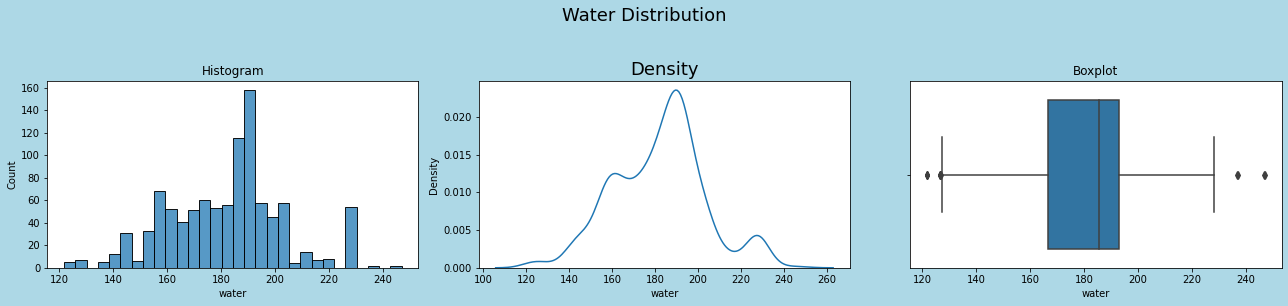

Super_plasticizer
Super_plasticizer Statistics
count    1005.000000
mean        6.033234
std         5.919967
min         0.000000
25%         0.000000
50%         6.100000
75%        10.000000
max        32.200000
Name: super_plasticizer, dtype: float64


Super_plasticizer Normality Test Result
P-value: 3.9839459643086454e-35 ,    Decision:  super_plasticizer not normally distributed


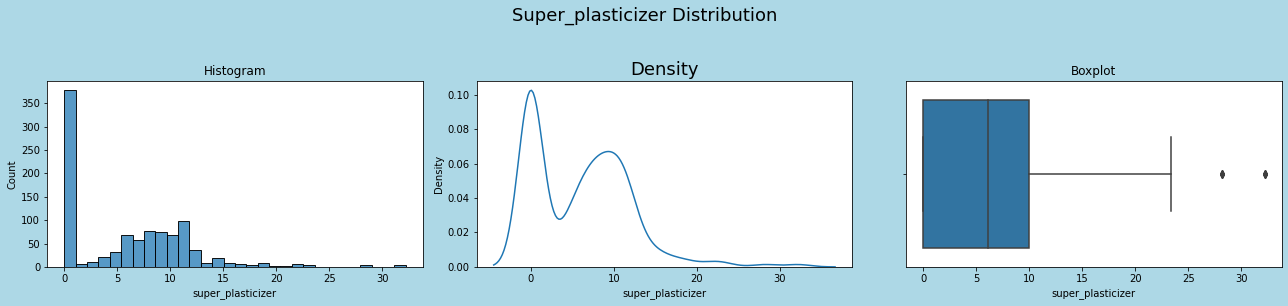

Coarse_aggregate
Coarse_aggregate Statistics
count    1005.000000
mean      974.376816
std        77.579667
min       801.000000
25%       932.000000
50%       968.000000
75%      1031.000000
max      1145.000000
Name: coarse_aggregate, dtype: float64


Coarse_aggregate Normality Test Result
P-value: 3.448426277401913e-07 ,    Decision:  coarse_aggregate not normally distributed


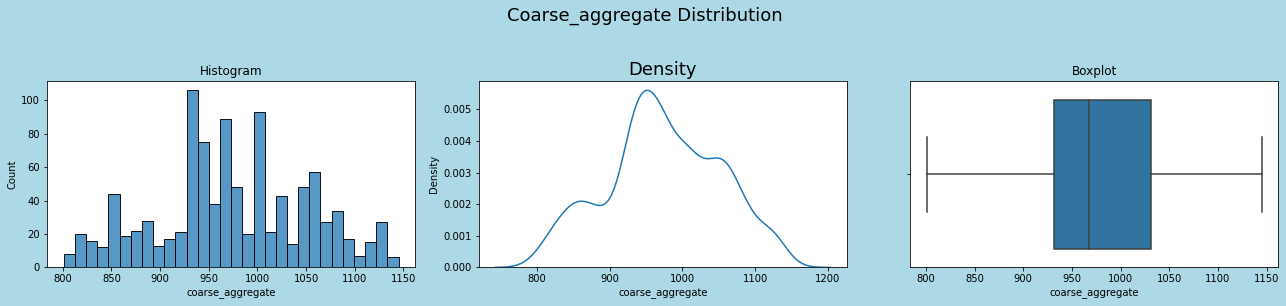

Fine_aggregate
Fine_aggregate Statistics
count    1005.000000
mean      772.688259
std        80.340435
min       594.000000
25%       724.300000
50%       780.000000
75%       822.200000
max       992.600000
Name: fine_aggregate, dtype: float64


Fine_aggregate Normality Test Result
P-value: 0.004291006583264156 ,    Decision:  fine_aggregate not normally distributed


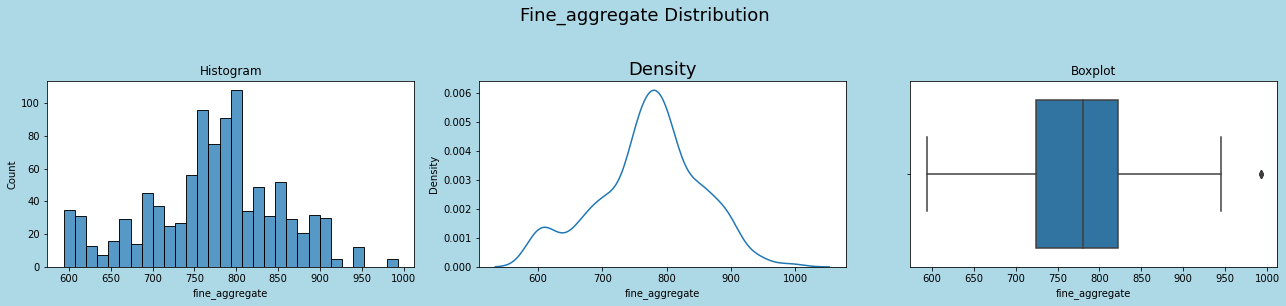

Age
Age Statistics
count    1005.000000
mean       45.856716
std        63.734692
min         1.000000
25%         7.000000
50%        28.000000
75%        56.000000
max       365.000000
Name: age, dtype: float64


Age Normality Test Result
P-value: 3.9929469938994235e-154 ,    Decision:  age not normally distributed


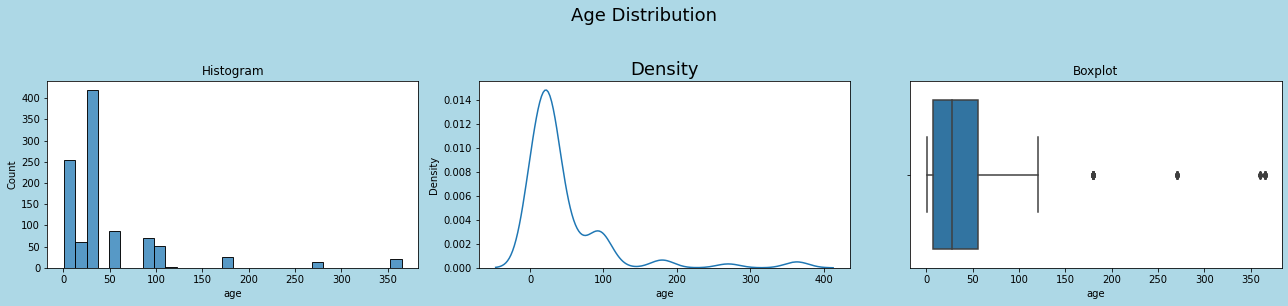

Compressive_strength_csmpa
Compressive_strength_csmpa Statistics
count    1005.000000
mean       35.250378
std        16.284815
min         2.330000
25%        23.520000
50%        33.800000
75%        44.870000
max        82.600000
Name: compressive_strength_csMPa, dtype: float64


Compressive_strength_csmpa Normality Test Result
P-value: 3.154432677195138e-07 ,    Decision:  compressive_strength_csMPa not normally distributed


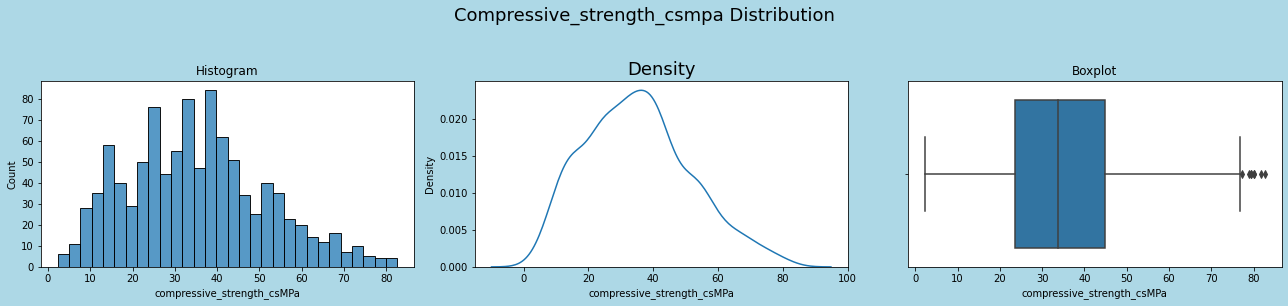

In [9]:
for col in df.columns.tolist():
    print(f'{col.capitalize()}')
    print(f'{col.capitalize()} Statistics')
    print(df[col].describe())
    print('\n')
    
    
    _, pvalue = normaltest(df[col].values)
    if pvalue < 0.05:
        result = f'{col} not normally distributed'
    else:
        result = f'{col} normally distributed'
    print(f'{col.capitalize()} Normality Test Result')
    print('P-value:',str(pvalue),',    Decision: ',result)
    
   
    plt.figure(figsize=(18,4), facecolor='lightblue')
    plt.suptitle(f'{col.capitalize()} Distribution',size = 18, y = 1.05)
    
    plt.subplot(1,3,1)
    sns.histplot(data=df, x = col, bins=30)
    plt.title('Histogram')
    
    plt.subplot(1,3,2)
    plt.title('Density', size = 18)
    sns.kdeplot(data=df[col])
    
    plt.subplot(1,3,3)
    sns.boxplot(data=df, x = col)
    plt.title('Boxplot')
    
    
    plt.tight_layout()
    plt.show() 
    
   

### Features Non-normality

Some beginners think (erroneously) that the normal distribution assumption of linear regression applies to their data. They might plot their response variable as a histogram and examine whether it differs from a normal distribution. Others assume that the explanatory variable must be normally-distributed. Neither is required. The normality assumption relates to the distributions of the residuals. This is assumed to be normally distributed, and the regression line is fitted to the data such that the mean of the residuals is zero.
\
[Source](https://mickteaching.wordpress.com/2016/04/19/data-need-to-be-normally-distributed-and-other-myths-of-linear-regression/)

### Removing Outliers From  Target

It can be seen that the target contains some outliers. Removing those outliers can imporove the scoring of the model. There are two methods for detecting and removing outliers. For normally distributed data I can use (mean - 3*standard_deviation) and (mean + 3*standard_deviation). For non normally distibuted data, I can use the interquartile method.Since the data is not normally distributed, I will use the interquartile method

In [10]:
q1 = df.compressive_strength_csMPa.quantile(0.25)
q3 = df.compressive_strength_csMPa.quantile(0.75)
iqr = q3-q1
upper_lim = q3 + 1.5*iqr
lower_lim = q1 - 1.5*iqr

df = df[(df.compressive_strength_csMPa >= lower_lim) & (df.compressive_strength_csMPa <= upper_lim)]

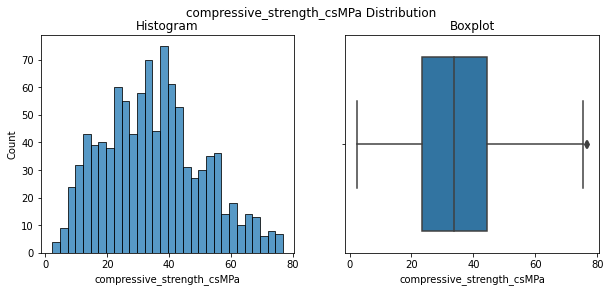

In [11]:
col = 'compressive_strength_csMPa'

plt.figure(figsize=(10,4))
plt.suptitle(f'{col} Distribution')

plt.subplot(1,2,1)
sns.histplot(data=df, x = col, bins=30)
plt.title('Histogram')

plt.subplot(1,2,2)
sns.boxplot(data=df, x = col)
plt.title('Boxplot')

plt.show()

cool!

____

## Features Selection (based on statiscal testing)

In [12]:
from scipy.stats import pearsonr

In [13]:
features = [col for col in df.columns if col != 'compressive_strength_csMPa']
y = df['compressive_strength_csMPa']

y.head()

1    61.89
2    40.27
3    41.05
4    44.30
5    47.03
Name: compressive_strength_csMPa, dtype: float64

cement vs. compressive_strength_csMPa:

Correlation Coefficient: 0.4822980854149247
p_value: 3.260615343299635e-59
There is a significant evidence of a positive relationship between cement and Concrete Compressive Strength


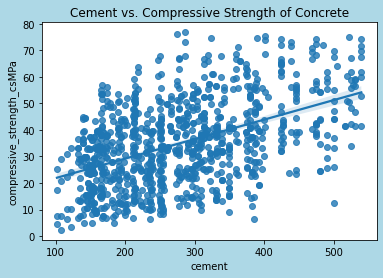

slag vs. compressive_strength_csMPa:

Correlation Coefficient: 0.08746360483548354
p_value: 0.0057181044887169895
There is a significant evidence of a positive relationship between slag and Concrete Compressive Strength


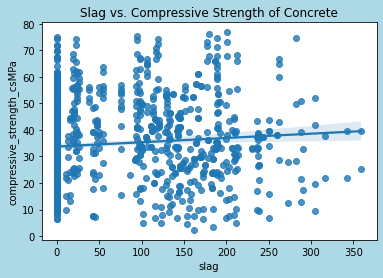

flya_ash vs. compressive_strength_csMPa:

Correlation Coefficient: -0.06373667178654671
p_value: 0.04421716444068777
There is a significant evidence of a negative relationship between flya_ash and Concrete Compressive Strength


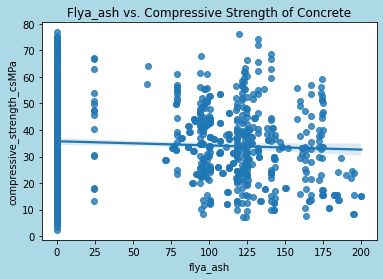

water vs. compressive_strength_csMPa:

Correlation Coefficient: -0.2555851420974356
p_value: 2.473472671917299e-16
There is a significant evidence of a negative relationship between water and Concrete Compressive Strength


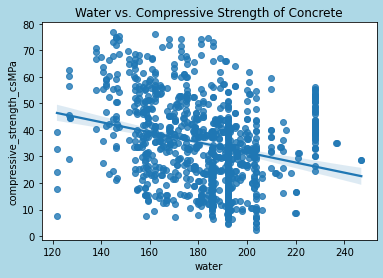

super_plasticizer vs. compressive_strength_csMPa:

Correlation Coefficient: 0.33453422476340167
p_value: 1.704786278505969e-27
There is a significant evidence of a positive relationship between super_plasticizer and Concrete Compressive Strength


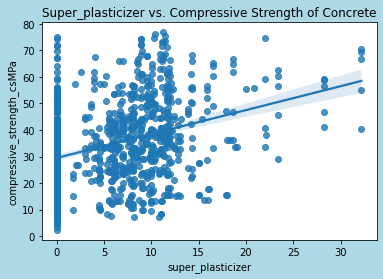

coarse_aggregate vs. compressive_strength_csMPa:

Correlation Coefficient: -0.15460377731918934
p_value: 9.339984407882778e-07
There is a significant evidence of a negative relationship between coarse_aggregate and Concrete Compressive Strength


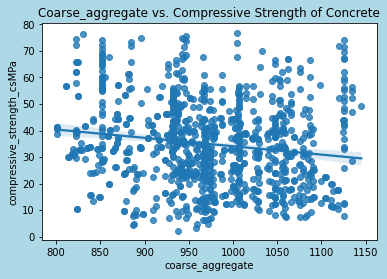

fine_aggregate vs. compressive_strength_csMPa:

Correlation Coefficient: -0.18091803888531244
p_value: 8.771870787097434e-09
There is a significant evidence of a negative relationship between fine_aggregate and Concrete Compressive Strength


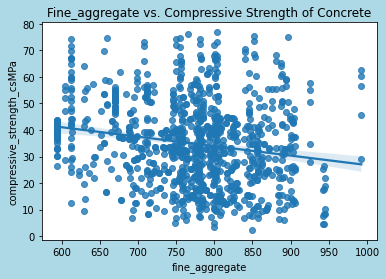

age vs. compressive_strength_csMPa:

Correlation Coefficient: 0.34524351184373747
p_value: 2.752890440217549e-29
There is a significant evidence of a positive relationship between age and Concrete Compressive Strength


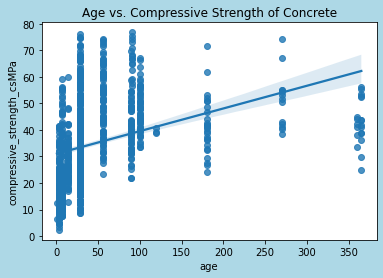

In [14]:
significant_features = []
for col in features:
    corr, p_value = pearsonr(df[col],df['compressive_strength_csMPa'])
    print(f'{col} vs. compressive_strength_csMPa:\n')
    print('Correlation Coefficient:',corr)
    print('p_value:',p_value)

    if p_value < 0.05:
        significant_features.append(col)
        if corr > 0:
            print(f'There is a significant evidence of a positive relationship between {col} and Concrete Compressive Strength')
        else:
            print(f'There is a significant evidence of a negative relationship between {col} and Concrete Compressive Strength')
    else:
        print(f'There is no significant relationship between {col} and Concrete Compressive Strength')

    plt.figure(figsize = (6,4), facecolor='lightblue')
    plt.title(f'{col.capitalize()} vs. Compressive Strength of Concrete')
    sns.regplot(x=col, y='compressive_strength_csMPa',data=df)
    plt.show()

### Dividing the Data to Features (X) and Target (y)

In [15]:
X_initial = df[significant_features]

print(X_initial.head())



   cement   slag  flya_ash  water  super_plasticizer  coarse_aggregate  \
1   540.0    0.0       0.0  162.0                2.5            1055.0   
2   332.5  142.5       0.0  228.0                0.0             932.0   
3   332.5  142.5       0.0  228.0                0.0             932.0   
4   198.6  132.4       0.0  192.0                0.0             978.4   
5   266.0  114.0       0.0  228.0                0.0             932.0   

   fine_aggregate  age  
1           676.0   28  
2           594.0  270  
3           594.0  365  
4           825.5  360  
5           670.0   90  


### Checking for Mutlicollinearity

As a graduate of Civil Engineering (domain knowledge), I knwo there is no multicollinearity between the components of concrete mixutres as each material or addtive serves different function. However, as machine learnign best practice, I should check for multicollinearity

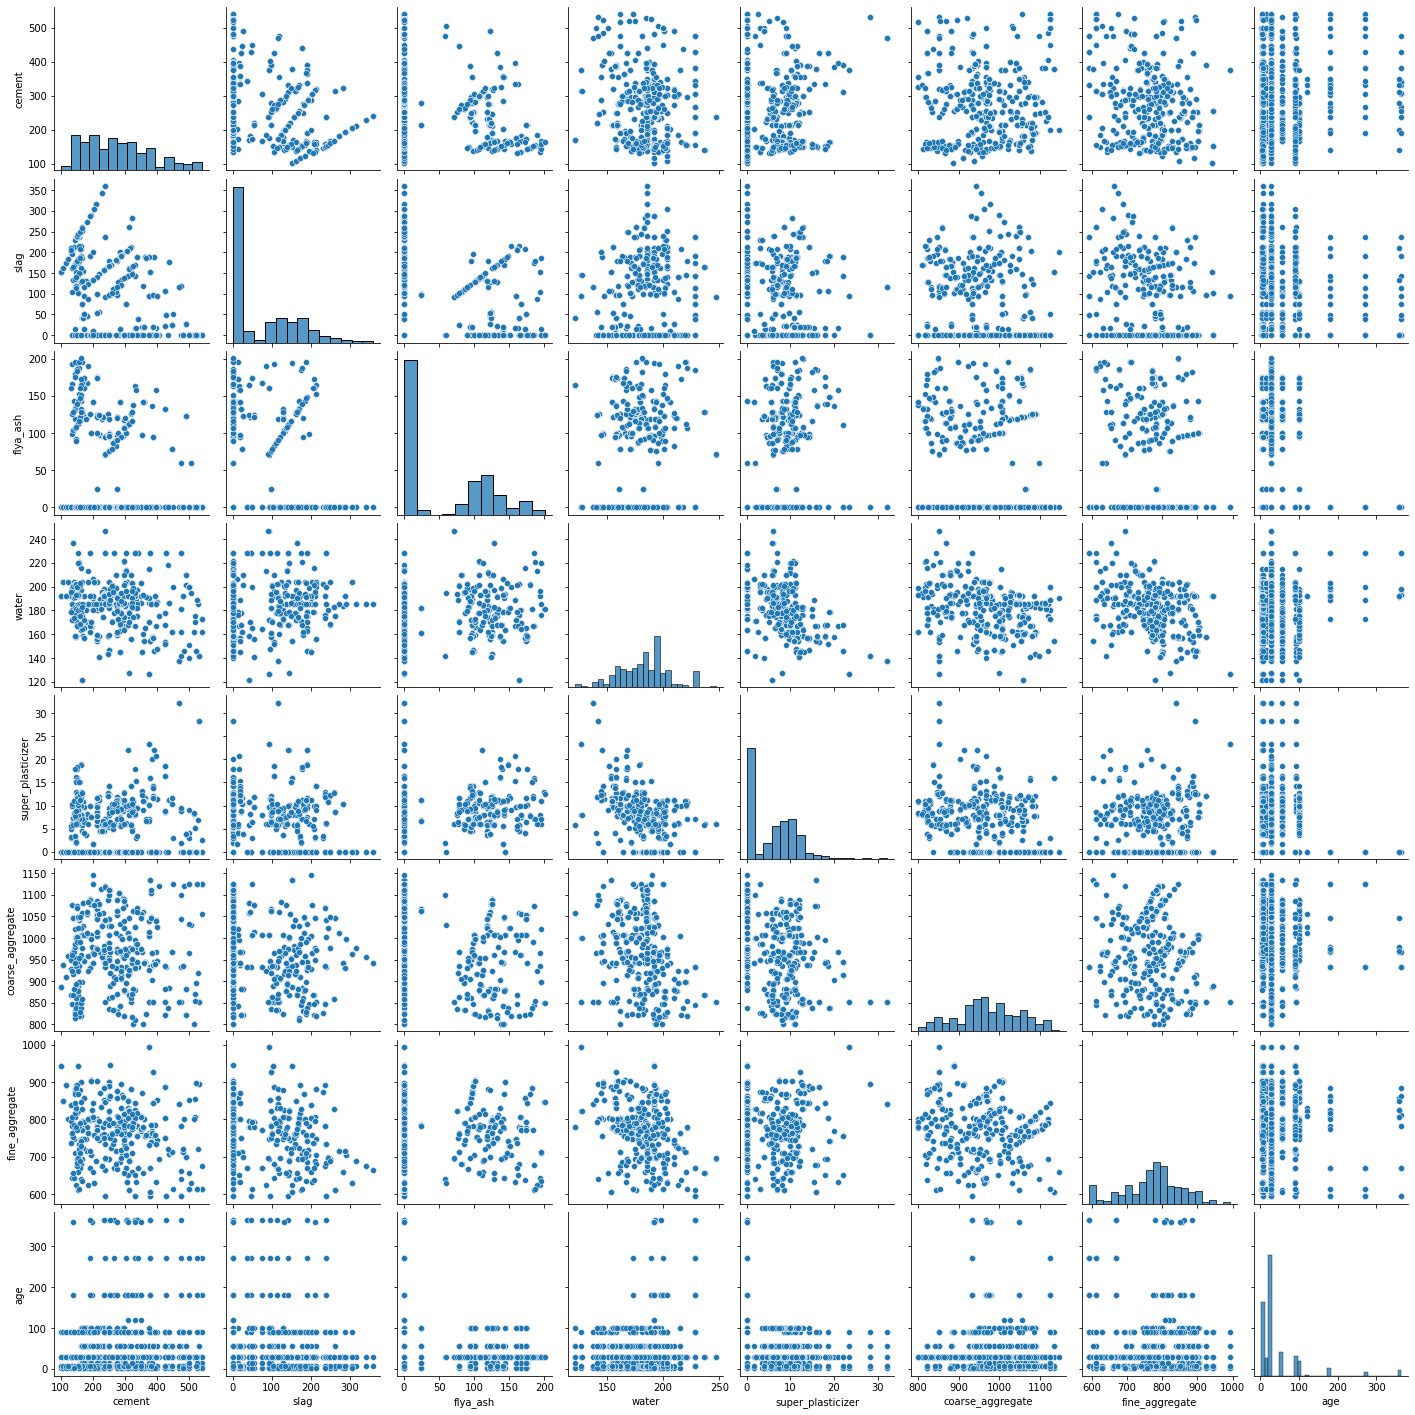

In [16]:
sns.pairplot(X_initial);

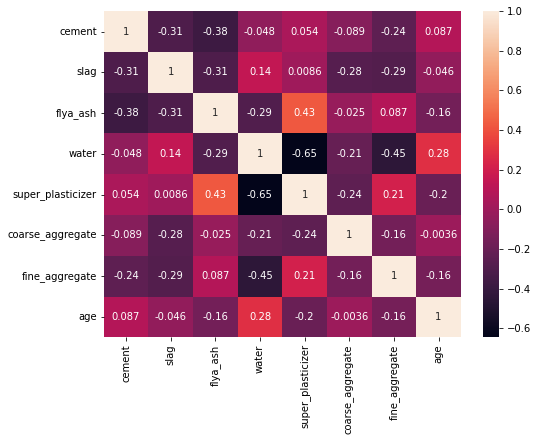

In [17]:
corr = X_initial.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
plt.xticks();

Looking at the values of pearson correlation, there is no significant maulticollinearity!

____

## Feature Egineering

In [18]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

### Scaling the Features

In [19]:
# It is essential for the featurs of a regression models to on the same scale

standarizing_transformer = StandardScaler()

X_scaled = standarizing_transformer.fit_transform(X_initial)

X_scaled = pd.DataFrame(X_scaled, columns = X_initial.columns)


# Although it is not necessary to normalize the targte varibale, sometimes it may lead to 
# better model.
y = numpy.log1p(y)

In [20]:
# divide the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size = 0.2, random_state = 2)

____

## Model Selection and Evaluation

![](https://scikit-learn.org/stable/_static/ml_map.png)

### Strategy
__Selecting an Estimator__
- I will take the recommendation of sklearn documentation with some modification.
- I will test several baseline models initially. 
- Next, I will try several ensemble regressors.
- Next, I will compares the performances of different baseline models.
- Finally, I will optimize and tune the selected model using GridSerachCV


__Selecting Evaluation Scoring Metrics__\
I will use r2 since I don't know the permissible limit of error. The permissible limit of error differs depending on the objective of the study

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.svm import LinearSVR

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor

from xgboost import XGBRegressor

### Models Building

In [22]:
l_r = LinearRegression(n_jobs=-1)

r_r = Ridge(random_state = 2)

knn_r = KNeighborsRegressor(n_jobs=-1)

dt_r = DecisionTreeRegressor(random_state = 2)

rf_r = RandomForestRegressor(random_state = 2, n_jobs= -1)

bg_r = BaggingRegressor(random_state= 2, n_jobs=-1)

xgb_r = XGBRegressor(random_state= 2, n_jobs=-1)

ada_r = AdaBoostRegressor()

gb_r = GradientBoostingRegressor()


models = [('LinearRegression',l_r),
          ('Ridge',r_r),
          ('KNeighborsRegressor',knn_r),
          ('DecisionTreeRegressor',dt_r),
          ('RandomForestRegressor',rf_r),
          ('BaggingRegressor',bg_r),
          ('AdaBoostRegressor',ada_r),
          ('GradientBoostingRegressor',gb_r),
          ('XGBRegressor',xgb_r)     
        ]
  

results = {'model': [],
           'r2_score':[],
           'mean_absolute_error':[]
          }

In [23]:
for model_name,  model in models:
    # X_transformed = polynomiallyTrasnformed_standarized_labeled(X,i)
    
    reg_model = model

    kf = KFold(n_splits=5, shuffle= True, random_state= 2).split(X_train,y_train)
    r2_scores =cross_val_score(reg_model, X_train,y_train,cv=kf, scoring='r2')

    kf = KFold(n_splits=5, shuffle= True, random_state= 2).split(X_train,y_train)
    mae_scores =cross_val_score(reg_model, X_train,y_train,cv=kf, scoring='neg_mean_absolute_error')


    results['model'].append(model_name)
    results['r2_score'].append(r2_scores.mean())
    results['mean_absolute_error'].append(-1*mae_scores.mean())
    
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('r2_score', ascending=False).reset_index(drop=True)
results_df

,model,r2_score,mean_absolute_error
0,XGBRegressor,0.914634,0.096989
1,GradientBoostingRegressor,0.904129,0.115305
2,RandomForestRegressor,0.891026,0.118985
3,BaggingRegressor,0.870394,0.129581
4,AdaBoostRegressor,0.788531,0.190277
5,DecisionTreeRegressor,0.779214,0.157721
6,KNeighborsRegressor,0.648805,0.231035
7,Ridge,0.520315,0.282283
8,LinearRegression,0.519966,0.282256


So, the model with the best r2 scoring is XGBRegressor and with no ploynomial transofrmation 

____

## Testing the Selected Model

In [24]:
from sklearn.metrics import r2_score

In [25]:
model = XGBRegressor(random_state= 2, n_jobs=-1)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print('The score of the test:')
print(r2_score(y_test,y_pred))

The score of the test:
0.9307441376190104


## Tuning the Model

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
xgb_r = XGBRegressor(random_state= 2, n_jobs=-1)

params_grid = {'eta':[0.1,0.2,0.3,0.4]}

kf = KFold(n_splits=5, shuffle= True, random_state= 2).split(X_scaled,y)

gs_xgb_r = GridSearchCV(xgb_r, params_grid, n_jobs=-1, cv = kf, scoring='r2')


gs_xgb_r.fit(X_scaled,y);

print('Best eta')
print(gs_xgb_r.best_params_)
print('\n')
print('Best score:')
print(gs_xgb_r.best_score_)

Best eta
{'eta': 0.2}


Best score:
0.9334140397687536


## Model Interpretation

In [28]:
xgb_reg =  XGBRegressor(random_state= 2, n_jobs=-1, eta = 0.2)
xgb_reg.fit(X_scaled,y)


importance_df = pd.DataFrame({'feature':X_scaled.columns.to_list(),
                              'importance':xgb_reg.feature_importances_}).\
                                sort_values('importance',ascending=False)

importance_df

,feature,importance
7,age,0.312057
0,cement,0.204868
4,super_plasticizer,0.182134
1,slag,0.106332
3,water,0.074790
6,fine_aggregate,0.052398
2,flya_ash,0.037724
5,coarse_aggregate,0.029698


From the importance dataframe, it can be seen that the 3 most impactfull measureable factors in the compressive strength of the concrete are age (in days), cement amount and superplasticizer amount. For each 1 day, 1 unit of cement (kg in m3) and unit of superplasticizer (kg in m3) the compressive strength of ocncrete inscreases by  0.31 MPa, 0.2 MPa  and 0.18 MPa respectively.

## Saving the Model

In [29]:
import joblib

In [30]:
joblib.dump(xgb_reg, 'xgb_reg.pkl')

['xgb_reg.pkl']

This model can be used to estimate the compressive strength of concrete before carrying out the physical experiemnt. By experimenting with different values of (water, cement, fine aggregate...ect), a reseacher can use this model to estimate the corresponding concrete compressive strength before carrying out the actual experiment in the lab. That can save effort, time and cost. 